In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Lx = 1.0        # Length of the x domain
Ly = 1.0        # Length of the y domain
T = 0.01        # Total time
Mx = 100        # Number of spatial points in the x direction
My = 100        # Number of spatial points in the y direction
N = 500         # Number of time steps
delta_1 = 0.1   # Diffusion coefficient for u
delta_2 = 0.05  # Diffusion coefficient for v

# Derived parameters
dx = Lx / Mx    # Spatial step size in the x direction
dy = Ly / My    # Spatial step size in the y direction
dt = T / N      # Time step size

# Reaction terms
def f(u, v):
    # Example reaction term for u (you can modify this)
    return 1.0 - u - u*v

def g(u, v):
    # Example reaction term for v (you can modify this)
    return u - v

# Grid
x = np.linspace(0, Lx, Mx)
y = np.linspace(0, Ly, My)
u = np.zeros((N, Mx, My))  # Solution grid for u
v = np.zeros((N, Mx, My))  # Solution grid for v

### Explicit finite difference method (double for loop)

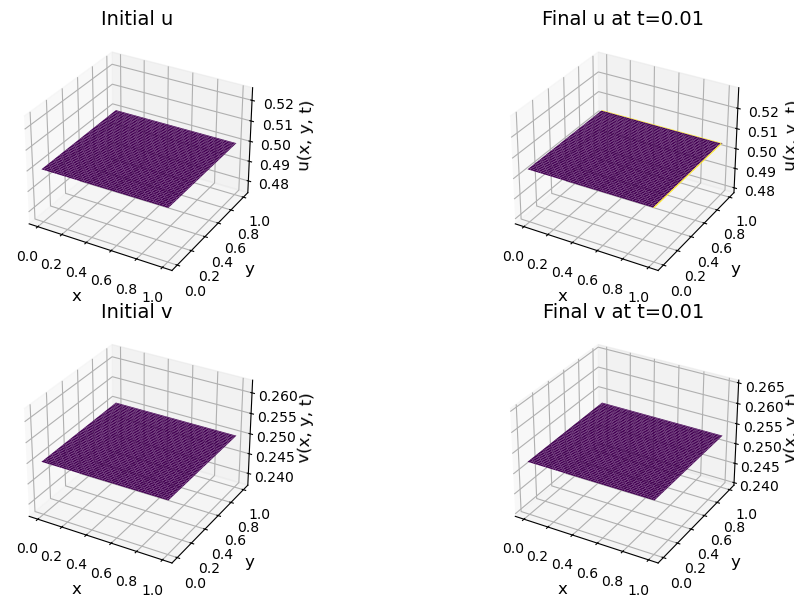

In [7]:
# Initial condition: random small perturbations around a steady state
u[0, :, :] = 0.5
v[0, :, :] = 0.25

# Time-stepping loop
for n in range(0, N-1):
    for i in range(1, Mx-1):
        for j in range(1, My-1):
            # Laplacian approximation for u (finite difference)
            lap_u = (u[n, i+1, j] + u[n, i-1, j] + u[n, i, j+1] + u[n, i, j-1] - 4*u[n, i, j]) / dx**2
            # Laplacian approximation for v (finite difference)
            lap_v = (v[n, i+1, j] + v[n, i-1, j] + v[n, i, j+1] + v[n, i, j-1] - 4*v[n, i, j]) / dy**2

            # Update u and v using their respective equations
            u[n+1, i, j] = u[n, i, j] + dt * (delta_1 * lap_u + f(u[n, i, j], v[n, i, j]))
            v[n+1, i, j] = v[n, i, j] + dt * (delta_2 * lap_v + g(u[n, i, j], v[n, i, j]))

    # Periodic boundary conditions for u and v
    u[n+1, 0, :] = u[n+1, Mx-2, :]  # Left boundary to right boundary
    u[n+1, Mx-1, :] = u[n+1, 1, :]  # Right boundary to left boundary
    u[n+1, :, 0] = u[n+1, :, My-2]  # Bottom boundary to top boundary
    u[n+1, :, My-1] = u[n+1, :, 1]  # Top boundary to bottom boundary

    v[n+1, 0, :] = v[n+1, Mx-2, :]  # Left boundary to right boundary
    v[n+1, Mx-1, :] = v[n+1, 1, :]  # Right boundary to left boundary
    v[n+1, :, 0] = v[n+1, :, My-2]  # Bottom boundary to top boundary
    v[n+1, :, My-1] = v[n+1, :, 1]  # Top boundary to bottom boundary

# Plot the initial and final solutions for u and v (surface plot)
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(12, 6))

# Initial condition for u
ax = fig.add_subplot(221, projection='3d')
ax.plot_surface(X, Y, u[0], cmap='viridis')
ax.set_title("Initial u", fontsize=14)
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("y", fontsize=12)
ax.set_zlabel("u(x, y, t)", fontsize=12)

# Final condition for u
ax = fig.add_subplot(222, projection='3d')
ax.plot_surface(X, Y, u[-1], cmap='viridis')
ax.set_title(f"Final u at t={T:.2f}", fontsize=14)
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("y", fontsize=12)
ax.set_zlabel("u(x, y, t)", fontsize=12)

# Initial condition for v
ax = fig.add_subplot(223, projection='3d')
ax.plot_surface(X, Y, v[0], cmap='viridis')
ax.set_title("Initial v", fontsize=14)
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("y", fontsize=12)
ax.set_zlabel("v(x, y, t)", fontsize=12)

# Final condition for v
ax = fig.add_subplot(224, projection='3d')
ax.plot_surface(X, Y, v[-1], cmap='viridis')
ax.set_title(f"Final v at t={T:.2f}", fontsize=14)
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("y", fontsize=12)
ax.set_zlabel("v(x, y, t)", fontsize=12)

plt.tight_layout()
plt.show()